In [1]:
###################################################
##### Recommender system with Graphlab-create #####
###################################################

In [2]:
import numpy as np
import pandas as pd

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

import graphlab
from graphlab import SFrame
graphlab.product_key.set_product_key('6E71-F824-73DC-CA4A-17C3-A731-B079-E278')

In [3]:
#Data
col_names = ["user_id", "item_id", "rating", "timestamp"]
data = pd.read_table("data/u.data", names=col_names)
data = data.drop("timestamp", 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
user_id    100000 non-null int64
item_id    100000 non-null int64
rating     100000 non-null int64
dtypes: int64(3)
memory usage: 2.3 MB


In [4]:
#Convert to SFrame and Split
sf = SFrame(data = data)
sf_train, sf_test = sf.random_split(.7, seed=5)

This non-commercial license of GraphLab Create for academic use is assigned to fattouri.elyazid@gmail.com and will expire on April 03, 2019.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\yazid\AppData\Local\Temp\graphlab_server_1522956475.log.0


In [5]:
# Create a FactorizationRecommender that learns latent factors for each user and item and uses them to make rating predictions.

model = graphlab.factorization_recommender.create(sf_train, regularization=1e-08, target='rating')

Recsys training: model = factorization_recommender

Preparing data set.

Data has 70089 observations with 943 users and 1633 items.

Data prepared in: 0.517409s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 8        |

| regularization                 | L2 Regularization on Factors                     | 1e-008   |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-010   |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 70089 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | 0.694348                                 |

| 5       | 0.0488281         | 0.724676                                 |

| 6       | 0.0244141         | 0.780224                                 |

| 7       | 0.012207          | 0.857731                                 |

+---------+-------------------+------------------------------------------+

| Final   | 0.0976562         | 0.694348                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 0us          | 1.26675           | 1.1255                |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 70.202ms     | 1.07812           | 1.03832               | 0.0976562   |

| 2       | 114.205ms    | 0.937986          | 0.968493              | 0.0580668   |

| 3       | 164.207ms    | 0.847333          | 0.920502              | 0.042841    |

| 4       | 291.215ms    | 0.766712          | 0.875613              | 0.0345267   |

| 5       | 494.226ms    | 0.700914          | 0.837195              | 0.029206    |

| 6       | 591.232ms    | 0.649994          | 0.806209              | 0.0254734   |

| 10      | 779.243ms    | 0.565128          | 0.75173               | 0.017366    |

| 11      | 828.245ms    | 0.553949          | 0.744256              | 0.016168    |

| 20      | 1.22s        | 0.505107          | 0.710682              | 0.0103259   |

| 30      | 1.65s        | 0.484249          | 0.695849              | 0.00761832  |

| 40      | 2.17s        | 0.472901          | 0.687645              | 0.00613981  |

| 50      | 2.69s        | 0.465496          | 0.682237              | 0.00519365  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.441382

Final training RMSE: 0.664329

In [6]:
# Return a score prediction for the user ids and item ids in the provided data set.
model.predict(sf_train)

dtype: float
Rows: 70089
[2.0368343719322266, 3.685852629788595, 3.5107824296731533, 3.2745636233169617, 3.492975024231154, 4.08394818911739, 4.192806152351576, 2.5475062110502305, 2.6865037099499287, 3.376812917836386, 1.8541095831472458, 3.739459311314303, 3.292557416208464, 3.310007912762839, 1.979897139318663, 2.65519156838246, 4.061057043917852, 3.678652969845015, 3.7096114733297405, 4.604165611513334, 4.251024586804586, 3.7826238476712284, 1.1983833589632096, 4.932981399543959, 2.588885260470587, 4.532238000728565, 3.7851228990633072, 2.535838557131964, 4.1795898654539165, 3.896498707779127, 4.652144578941542, 3.0404132881242814, 4.070705024250227, 2.7374561333138527, 3.4907873922068657, 4.689651755340773, 4.7442870938260135, 1.0849662625271859, 5.111352948196608, 4.920134497531134, 1.6633232065517487, 4.553328303344923, 4.067631195955354, 4.615813152589279, 2.658253598682958, 3.8858893641311707, 2.1912947424728455, 3.6894109376747193, 3.130069372900206, 4.573069540508467, 4.9093

In [7]:
# provide a sorted list of top-K items mosthighly recommended for each user (here i choose user with id 900) (from among
# those items not already rated by the user)
rec = model.recommend(users= [900], k=5)
rec

user_id,item_id,score,rank
900,50,4.83799719597,1
900,135,4.80598711754,2
900,172,4.63247656608,3
900,195,4.57395672584,4
900,792,4.55738472725,5


In [8]:
# Once done, The model can be used to compute the
# error (RMSE) on predictions made on the Test data
error = model.evaluate_rmse(sf_test, target='rating')
error['rmse_overall']

Less than 4 successfully started. Using only 3 workers.

All operations will proceed as normal, but lambda operations will not be able to use all available cores.

(The location of the log file is printed at the start of the GraphLab server).

1.0466302395738623

In [14]:
# we train several models, each using a different value of the regularization parameter. range: [1e-5, 1e-1]
# the Validation set determine which model results in the lowest RMSE
# Fix regularization parameter
sf_train_2, sf_validation = sf_train.random_split(.75)

x = np.arange(1e-5, 1e-1, 0.002)
y = []
for r in range(len(x)):
    #train
    model = graphlab.factorization_recommender.create(sf_train_2, regularization = x[r], target='rating', verbose = False)
    #compute RMSE
    error = model.evaluate_rmse(sf_validation, target='rating')
    y.append(error['rmse_overall'])

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

Recsys training: model = factorization_recommender

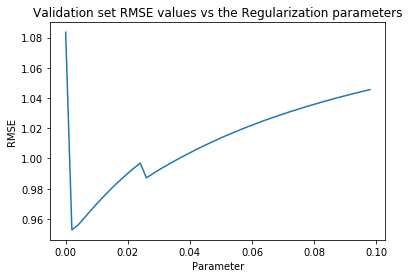

In [23]:
#The plot
plt.plot(x, y)
plt.xlabel('Parameter')
plt.ylabel('RMSE')
plt.title('Validation set RMSE values vs the Regularization parameters')
plt.show()

The lowest error corresponds to a regularization parameter around   x = 0.002010